Initialization of Libraries

In [29]:
import sys
assert sys.version_info >= (3,5)

In [30]:
import sklearn
assert sklearn.__version__ >= "0.20"

In [31]:
import pandas as pd

In [32]:
import numpy as np

In [33]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [34]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [35]:
from pandas.plotting import scatter_matrix

Importing traffic datasets dataset 

In [36]:
binary_class_x_train=pd.read_csv('./Traffic_Sign/Binary_Classification/x_train_bin.csv')
#binary_class_x_test=pd.read_csv('./Traffic_Sign/Binary_Classification/x_test_bin.csv')
binary_class_y_train=pd.read_csv('./Traffic_Sign/Binary_Classification/y_train_bin.csv')
# binary_class_y_test=pd.read_csv('./Traffic_Sign/Binary_Classification/x_test_bin.csv')

# complete_x_train=pd.read_csv('./Traffic_Sign/CompleteDataSet/x_train_all.csv'
# complete_x_test=pd.read_csv('./Traffic_Sign/CompleteDataSet/x_test_all.csv'
# complete_y_train=pd.read_csv('./Traffic_Sign/CompleteDataSet/y_train_all.csv'
# complete_y_test=pd.read_csv('./Traffic_Sign/CompleteDataSet/x_test_all.csv')

# onevsall_y_train_0-pd.read_csv('./Traffic_Sign/OnevrsAll/0_vrs_all/y_train_0.csv')
# onevsall_y_train_1-pd.read_csv('./Traffic_Sign/OnevrsAll/1_vrs_all/y_train_1.csv')
# onevsall_y_train_2-pd.read_csv('./Traffic_Sign/OnevrsAll/2_vrs_all/y_train_2.csv')
# onevsall_y_train_3-pd.read_csv('./Traffic_Sign/OnevrsAll/3_vrs_all/y_train_3.csv')
# onevsall_y_train_4-pd.read_csv('./Traffic_Sign/OnevrsAll/4_vrs_all/y_train_4.csv')
# onevsall_y_train_5-pd.read_csv('./Traffic_Sign/OnevrsAll/5_vrs_all/y_train_5.csv')
# onevsall_y_train_6-pd.read_csv('./Traffic_Sign/OnevrsAll/6_vrs_all/y_train_6.csv')
# onevsall_y_train_7-pd.read_csv('./Traffic_Sign/OnevrsAll/7_vrs_all/y_train_7.csv')
# onevsall_y_train_8-pd.read_csv('./Traffic_Sign/OnevrsAll/8_vrs_all/y_train_8.csv')
# onevsall_y_train_9-pd.read_csv('./Traffic_Sign/OnevrsAll/9_vrs_all/y_train_09.csv')

In [37]:
binary_class_x_train.head()


,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,87.0,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,96.0,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,98.0,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,112.0,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,100.0,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0


In [38]:
binary_class_y_train.head()

,0
0,0
1,0
2,0
3,0
4,0


In [39]:
binary_class_x_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
count,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,...,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000
mean,107.626337,107.997531,107.642387,107.848148,108.282716,108.447325,109.094650,109.758848,109.731687,110.120988,...,98.186831,97.595885,97.439918,96.228807,94.332922,92.999177,91.760905,90.911111,90.803292,90.398354
std,76.491958,76.997490,76.947931,76.651862,76.140000,75.619028,75.465342,75.633040,75.917473,76.222585,...,69.569017,69.781701,70.654812,71.118045,71.099191,70.851337,70.482417,70.175053,69.958424,70.347243
min,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
25%,48.000000,49.000000,49.000000,49.000000,50.000000,52.000000,51.000000,52.000000,51.000000,50.000000,...,42.000000,43.000000,43.000000,42.000000,41.000000,41.000000,40.000000,39.000000,39.000000,39.000000
50%,79.000000,79.000000,78.000000,79.000000,79.000000,80.000000,81.000000,81.000000,80.000000,82.000000,...,75.000000,75.000000,73.000000,71.000000,67.000000,66.000000,64.000000,64.000000,64.000000,62.000000
75%,156.000000,155.000000,153.750000,154.000000,153.000000,152.000000,152.000000,157.750000,157.750000,159.000000,...,140.000000,140.000000,137.000000,134.000000,127.000000,127.000000,126.750000,126.000000,125.000000,125.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [40]:
binary_class_y_train.describe()

,0
count,2430.000000
mean,0.913580
std,0.281041
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


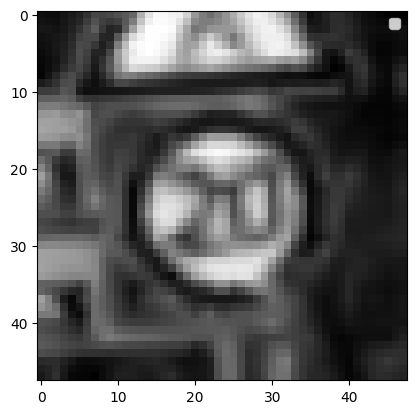

In [76]:
plt.imshow(binary_class_x_train.iloc[0].to_numpy().reshape(48,48), cmap='gray')
plt.legend()
